### House Price Prediction

In [1]:
import pandas as pd
import torch
import torch.nn as nn

Importing the Boston Housing Database

In [2]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crime,landzone,indus,chas,nox,room,age,distance,rad,tax,ptratio,b,lstatus,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Visualize the correlation among all the features of the dataset

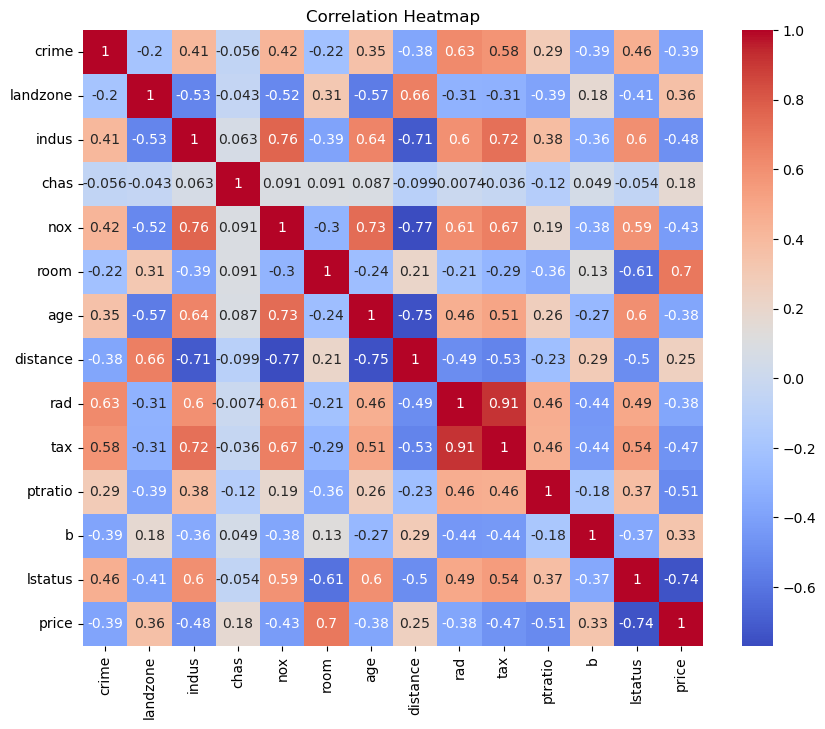

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Visualize the relation of the features with the price of the house

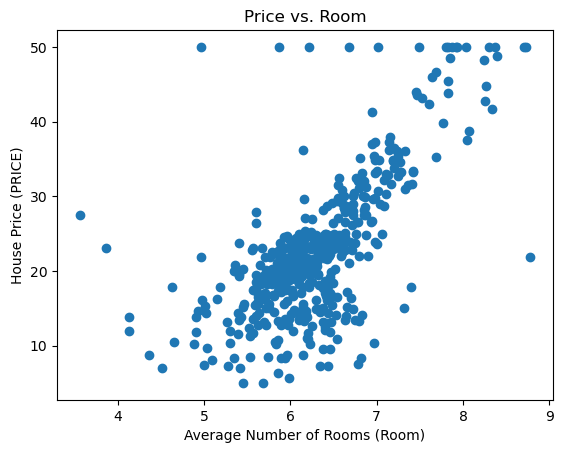

In [4]:
# Scatter plot of RM (average number of rooms per dwelling) vs PRICE
plt.scatter(df['room'], df['price'])
plt.xlabel('Average Number of Rooms (Room)')
plt.ylabel('House Price (PRICE)')
plt.title('Price vs. Room')
plt.show()

Text(0.5, 1.0, 'Price vs Population Status')

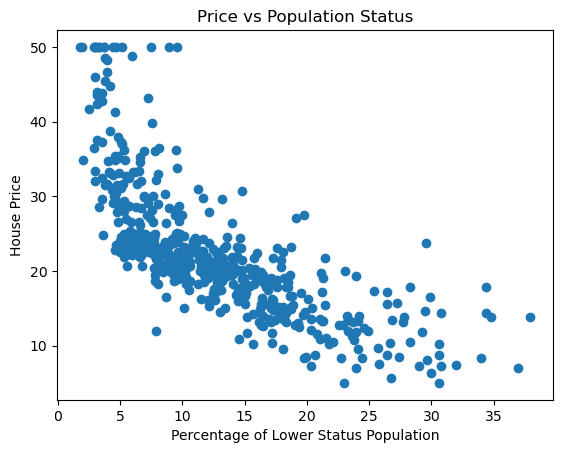

In [5]:
# scatter plot of lstat vs price
plt.scatter(df['lstatus'], df['price'])
plt.xlabel('Percentage of Lower Status Population')
plt.ylabel('House Price')
plt.title('Price vs Population Status')

#### Removing the highly corelated features

In [6]:
x_df = df.drop(['price', 'tax', 'age', 'nox'], axis=1)
y_df = df['price']

In [7]:
x = x_df.values
y = y_df.values

Scaling the database to to equaily fit every features 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Scaling features

In [9]:
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  

Splitting the database for training and testing the models

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
type(x), type(y), type(X_scaled),type(y_train)

(numpy.ndarray, torch.Tensor, torch.Tensor, torch.Tensor)

#### Building a Linear Regression Model

In [12]:
import torch.nn as nn

# Define a simple Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 1 output, since we are predicting house price
        
    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Building a neural network

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)  # 1 output (price prediction)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model_nn = NeuralNet(input_dim=input_dim, hidden_dim=64)  # e.g., 64 hidden units
optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=0.001)

#### Training the Linear model

In [14]:
# Train the Linear Regression Model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 33.2556
Epoch [200/1000], Loss: 23.5724
Epoch [300/1000], Loss: 23.2524
Epoch [400/1000], Loss: 23.1945
Epoch [500/1000], Loss: 23.1723
Epoch [600/1000], Loss: 23.1628
Epoch [700/1000], Loss: 23.1586
Epoch [800/1000], Loss: 23.1568
Epoch [900/1000], Loss: 23.1559
Epoch [1000/1000], Loss: 23.1555


#### Training the neural network model

In [15]:
# Train the Neural Network Model
num_epochs = 1000
for epoch in range(num_epochs):
    model_nn.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model_nn(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], NN Loss: {loss.item():.4f}')

Epoch [100/1000], NN Loss: 458.1876
Epoch [200/1000], NN Loss: 195.3609
Epoch [300/1000], NN Loss: 64.2396
Epoch [400/1000], NN Loss: 33.2120
Epoch [500/1000], NN Loss: 26.6668
Epoch [600/1000], NN Loss: 23.8139
Epoch [700/1000], NN Loss: 21.8271
Epoch [800/1000], NN Loss: 20.2650
Epoch [900/1000], NN Loss: 18.8823
Epoch [1000/1000], NN Loss: 17.6441


#### Testing the Linear Model

In [16]:
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    # for i in range(len(y_pred_test)):
    #     print(f"y_eval: {y_pred_test[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test[i].item() - y_test[i]}.")
    rmse = torch.sqrt(test_loss)
    print(f'Linear Regression Test RMSE: {rmse.item():.4f}')

Linear Regression Test RMSE: 5.1445


#### Testing the neural network model

In [17]:
# Evaluation on test data (Neural Network)
model_nn.eval()
with torch.no_grad():
    y_pred_test_nn = model_nn(X_test)
    test_loss_nn = criterion(y_pred_test_nn, y_test)
    # for i in range(len(y_pred_test_nn)):
    #     print(f"y_eval: {y_pred_test_nn[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_nn[i].item() - y_test[i]}.")
    rmse_nn = torch.sqrt(test_loss_nn)
    print(f'Neural Network Test RMSE: {rmse_nn.item():.4f}')

Neural Network Test RMSE: 4.4039


In [18]:
# Extract the learned coefficients (Linear Regression)
weights = model.linear.weight.detach().numpy().flatten()
features = x_df.columns  # All feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Weights': weights})
importance_df = importance_df.sort_values(by='Weights', ascending=False)

print(importance_df)

    Feature   Weights
4      room  3.221116
8         b  1.209419
3      chas  0.678068
1  landzone  0.549761
6       rad  0.442557
2     indus -0.854655
0     crime -0.880330
7   ptratio -1.596573
5  distance -2.118566
9   lstatus -3.993986


#### Ridge regression model

Building the Ridge Regression model

In [19]:
def ridge_loss(output, target, modl, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l2_reg = torch.tensor(0.)
    for param in modl.parameters():
        l2_reg += torch.norm(param)
    return l2_reg + mse_loss + alpha

model_ridge = LinearRegressionModel(input_dim)
optimizer_ridge = torch.optim.SGD(model_ridge.parameters(), lr=0.01)

Training the ridge model

In [20]:
num_epochs = 1000
for epoch in range(num_epochs):
    model_ridge.train()
    y_pred_train = model_ridge(X_train)
    
    loss_ridge = ridge_loss(y_pred_train, y_train, model_ridge, 0.1)
    
    optimizer_ridge.zero_grad()
    loss_ridge.backward()
    optimizer_ridge.step()
    
    if (epoch) % 99 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_ridge.item():.10f}')

Epoch [1/1000], Loss: 612.0320434570
Epoch [100/1000], Loss: 60.5943260193
Epoch [199/1000], Loss: 51.5560264587
Epoch [298/1000], Loss: 51.3128738403
Epoch [397/1000], Loss: 51.2886047363
Epoch [496/1000], Loss: 51.2823600769
Epoch [595/1000], Loss: 51.2804489136
Epoch [694/1000], Loss: 51.2798461914
Epoch [793/1000], Loss: 51.2796478271
Epoch [892/1000], Loss: 51.2795867920
Epoch [991/1000], Loss: 51.2795639038


Testing the model

In [21]:
model_ridge.eval()
with torch.no_grad():
    y_pred_test_ridge = model_ridge(X_test)
    test_loss_ridge = criterion(y_pred_test_ridge, y_test)
    # for i in range(len(y_pred_test_ridge)):
    #     print(f"y_eval: {y_pred_test_ridge[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_ridge[i].item() - y_test[i]}.")
    rmse_ridge = torch.sqrt(test_loss_ridge)
    print(f'Ridge Regression Model Test RMSE: {rmse_ridge.item():.4f}')

Ridge Regression Model Test RMSE: 5.1838


In [22]:
weights_ridge = model_ridge.linear.weight.detach().numpy().flatten()

importance_df_ridge = pd.DataFrame({'Feature': features, 'Weights': weights_ridge})
importance_df_ridge = importance_df_ridge.sort_values(by='Weights', ascending=False)

print(importance_df_ridge)

    Feature   Weights
4      room  3.205289
8         b  1.117071
3      chas  0.715659
1  landzone  0.380381
6       rad  0.218755
2     indus -0.756541
0     crime -0.790859
7   ptratio -1.580376
5  distance -1.607493
9   lstatus -3.535460


#### Lasso Regression model 

Building the model

In [23]:
def lasso_loss(output, target, model, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l1_reg = torch.tensor(0.)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return mse_loss + alpha + l1_reg

model_lasso = LinearRegressionModel(input_dim)
optimizer_lasso = torch.optim.SGD(model_lasso.parameters(), lr=0.01)

Training the model

In [24]:
epochs = 1000

for epoch in range(epochs):
    model_lasso.train()

    y_pred_train = model_lasso(X_train)

    loss_lasso = lasso_loss(y_pred_train, y_train, model_lasso, 0.1)

    optimizer_lasso.zero_grad()
    loss_lasso.backward()
    optimizer_lasso.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_lasso.item():.4f}")

Epoch: 99, Loss: 66.7208
Epoch: 199, Loss: 57.7932
Epoch: 299, Loss: 57.6038
Epoch: 399, Loss: 57.5917
Epoch: 499, Loss: 57.6019
Epoch: 599, Loss: 57.5972
Epoch: 699, Loss: 57.5914
Epoch: 799, Loss: 57.5901
Epoch: 899, Loss: 57.5930
Epoch: 999, Loss: 57.5908


Testing the model

In [25]:
model_lasso.eval()
with torch.no_grad():
    y_pred_test_lasso = model_lasso(X_test)
    test_loss_lasso = criterion(y_pred_test_lasso, y_test)
    # for i in range(len(y_pred_test_lasso)):
    #     print(f"y_eval: {y_pred_test_lasso[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_lasso[i].item() - y_test[i]}.")
    rmse_lasso = torch.sqrt(test_loss_lasso)
    print(f'Lasso Regression Model Test RMSE: {rmse_lasso.item():.4f}')

Lasso Regression Model Test RMSE: 5.2805


#### Support Vector Regressor

Building the model

In [26]:
class SupportVectorRegressor(nn.Module):
    def __init__(self, n_features, epsilon=0.1, c=1.0):
        super(SupportVectorRegressor, self).__init__()
        self.linear = nn.Linear(n_features, 1)
        self.epsilon = epsilon
        self.c = c

    def forward(self, x):
        return self.linear(x)
    
    def epsilon_intesive_loss(self, pred, targets):
        abs_error = torch.abs(pred - targets)
        loss = torch.where(abs_error < self.epsilon, torch.zeros_like(abs_error), abs_error - self.epsilon)
        return torch.mean(loss) + self.c + torch.sum(self.linear.weight ** 2)
    
svr_model = SupportVectorRegressor(input_dim)
optimizer_svr = torch.optim.SGD(svr_model.parameters(), lr=0.01)

Training the model

In [27]:
epochs = 1000
for epoch in range(epochs):
    y_pred = svr_model(X_train)
    loss_svr = svr_model.epsilon_intesive_loss(y_pred, y_train)

    optimizer_svr.zero_grad()
    loss_svr.backward()
    optimizer_svr.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_svr.item()}")

Epoch: 0, Loss: 24.031753540039062
Epoch: 100, Loss: 22.543052673339844
Epoch: 200, Loss: 21.53445816040039
Epoch: 300, Loss: 20.5343074798584
Epoch: 400, Loss: 19.5343017578125
Epoch: 500, Loss: 18.53499412536621
Epoch: 600, Loss: 17.54801368713379
Epoch: 700, Loss: 16.57418441772461
Epoch: 800, Loss: 15.630966186523438
Epoch: 900, Loss: 14.728879928588867


Testing the model

In [28]:
with torch.no_grad():
    y_pred_test_svr = svr_model(X_test)
    test_loss_svr = svr_model.epsilon_intesive_loss(y_pred_test_svr, y_test)
    # for i in range(len(y_pred_test_svr)):
    #     print(f"y_eval: {y_pred_test_svr[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_svr[i].item() - y_test[i]}.")
    rmse_svr = torch.sqrt(nn.MSELoss()(y_pred_test_svr, y_test))
    print(f'Support Vector Regressor Test RMSE: {rmse_svr.item():.4f}')

Support Vector Regressor Test RMSE: 14.2371


In [29]:
weights_svr = svr_model.linear.weight.detach().numpy().flatten()

importance_df_svr = pd.DataFrame({'Feature': features, 'Weight': weights_svr})
importance_df_svr = importance_df_svr.sort_values(by='Weight', ascending=False)

print(importance_df_svr)

    Feature    Weight
4      room  0.048890
8         b  0.044369
5  distance  0.042994
1  landzone  0.023643
3      chas  0.015895
2     indus -0.054499
7   ptratio -0.063412
6       rad -0.071079
0     crime -0.076535
9   lstatus -0.090236


#### Tree Regressor Model ( Decision Tree, Random Forest, Gradient Boosting )

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Training the Decision Tree Regressor Model

In [31]:
dtr_model = DecisionTreeRegressor(random_state=42)

dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Training the Random Forest MModel

In [32]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

rfr_model.fit(X_train, y_train)

/home/imck037/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Training the Gradient Boosting Regressor Model

In [33]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42)

gbr_model.fit(X_train, y_train)

/home/imck037/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, random_state=42)

Testing the Decision Tree Model

In [34]:
y_pred_test_dtr = dtr_model.predict(X_test)
loss_dtr = mean_squared_error(y_pred_test_dtr, y_test)
# for i in range(len(y_pred_test_dtr)):
#     print(f"y_eval: {y_pred_test_dtr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_dtr[i].item() - y_test[i].item()}.")
rmse_dtr = (loss_dtr ** (1/2))
print(f'Decision Tree Regressor Test RMSE: {rmse_dtr.item():.4f}')

Decision Tree Regressor Test RMSE: 3.9569


Testing The Random Forest Model

In [35]:
y_pred_test_rfr = rfr_model.predict(X_test)
loss_rfr = mean_squared_error(y_pred_test_rfr, y_test)
# for i in range(len(y_pred_test_rfr)):
#     print(f"y_eval: {y_pred_test_rfr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_rfr[i].item() - y_test[i].item()}.")
rmse_rfr = (loss_rfr ** (1/2))
print(f'Random Forest Regressor Test RMSE: {rmse_rfr.item():.4f}')

Random Forest Regressor Test RMSE: 3.0856


Testing the Gradient Boosting Model

In [36]:
y_pred_test_gbr = gbr_model.predict(X_test)
loss_gbr = mean_squared_error(y_pred_test_gbr, y_test)
# for i in range(len(y_pred_test_gbr)):
#     print(f"y_eval: {y_pred_test_gbr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_gbr[i].item() - y_test[i].item()}.")
rmse_gbr = (loss_gbr ** (1/2))
print(f'Gradient Boosting Regressor Test RMSE: {rmse_gbr.item():.4f}')

Gradient Boosting Regressor Test RMSE: 4.5717


#### Visualize The model performance with shap

In [37]:
def model_predict(data_as_numpy):
    data_as_tensor = torch.tensor(data_as_numpy, dtype=torch.float32)
    with torch.no_grad():
        return model(data_as_tensor).numpy()

Shap interpretation of Linear Regression Model

In [45]:
import shap

# explainer = shap.Explainer(model_predict, masker=X_test.numpy())

# shap_values = explainer.shap_values(X_test.numpy())

# plt.title('Shap interpretation of Linear Regression Model')
# shap.summary_plot(shap_values, X_test, feature_names=features)
# plt.show()

Shap Interpretation of Decison Tree Regressor Model

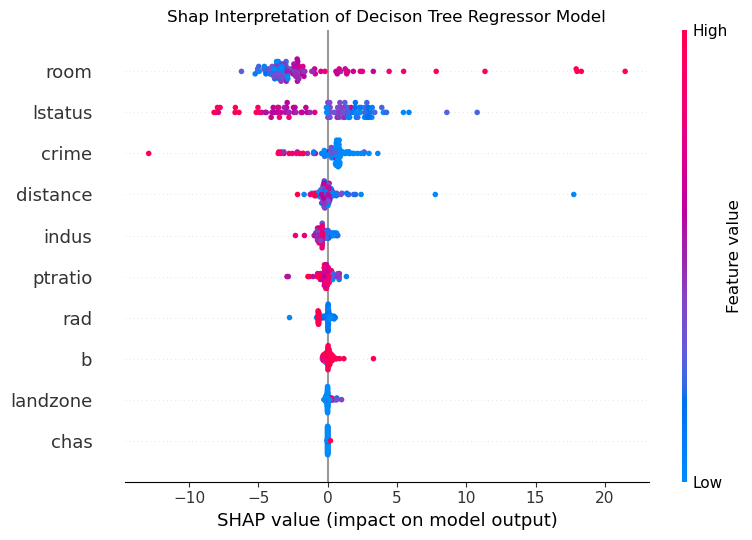

In [41]:
dtr_explainer = shap.TreeExplainer(dtr_model)

dtr_shap_values = dtr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Decison Tree Regressor Model')
shap.summary_plot(dtr_shap_values, X_test, feature_names=features)
plt.show()

Shap Interpretation of Random Forest Regressor Model

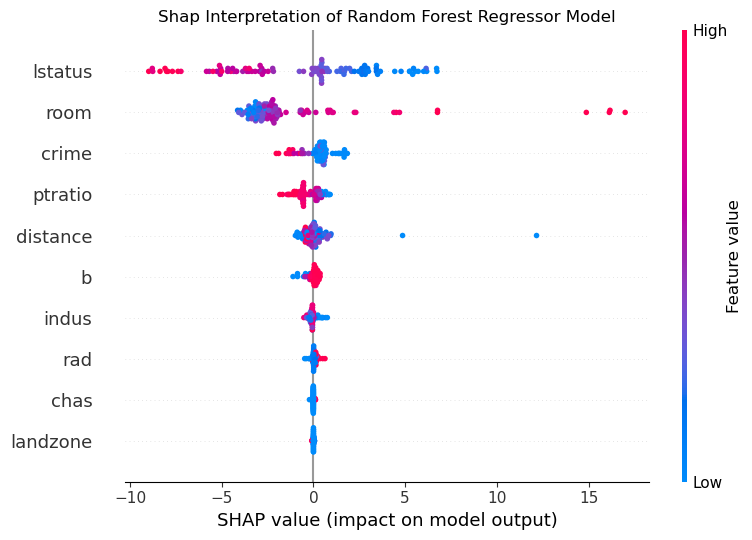

In [42]:

rfr_explainer = shap.TreeExplainer(rfr_model)

rfr_shap_values = rfr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Random Forest Regressor Model')
shap.summary_plot(rfr_shap_values, X_test, feature_names=features)
plt.show()

Shap Interpretation of Gradient Boosting Regressor Model

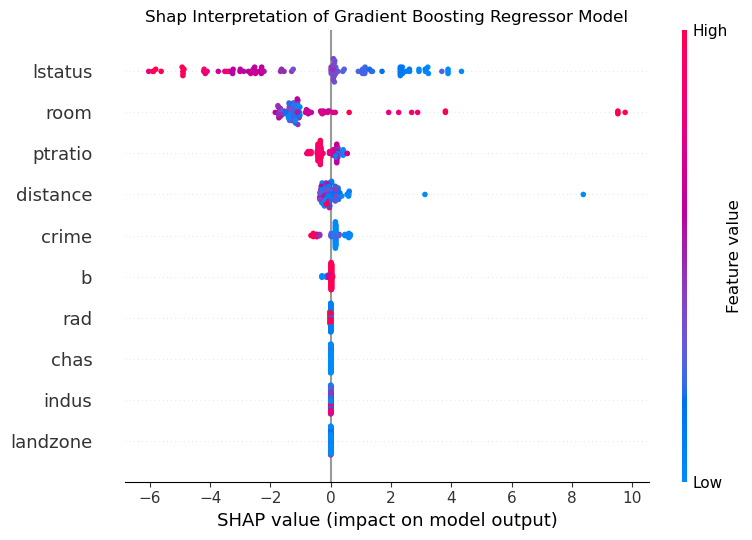

In [43]:

gbr_explainer = shap.TreeExplainer(gbr_model)

gbr_shap_values = gbr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Gradient Boosting Regressor Model')
shap.summary_plot(gbr_shap_values, X_test, feature_names=features)
plt.show()